In [616]:
import pandas as pd
import numpy as np
import yfinance as yf
import sys
import datetime
from pandas.tseries.offsets import BDay
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics

In [617]:
train = pd.read_csv('completed_features.csv')
train  = train.drop(train.columns[0], axis = 1)
train.head()

,Symbol,Name,Exchange,Sector,industry,dividendRate,exDividendDate,lastSplitDate,lastSplitFactor,Buy,...,Exponential Moving Average,day1,day2,day3,day4,close on day 0,close on day 1,close on day 2,close on day 3,close on day 4
0,DDD,3D Systems Corporation,NYSE,Technology,Computer Software: Prepackaged Software,NaN,0.000000e+00,0,0.0,0.0,...,0.789753,1.0,0.0,0.0,1.0,6.610000,6.690000,6.590000,6.590000,6.720000
1,MMM,3M Company,NYSE,Health Care,Medical/Dental Instruments,5.88,1.597968e+09,0,0.0,1.0,...,0.937332,1.0,1.0,1.0,1.0,154.959518,156.376633,157.278427,157.853180,158.398224
2,WUBA,58.com Inc.,NYSE,Technology,"Computer Software: Programming, Data Processing",NaN,0.000000e+00,0,0.0,0.0,...,0.841168,1.0,1.0,0.0,0.0,54.220001,54.500000,54.270000,54.040001,54.009998
3,EGHT,8x8 Inc,NYSE,Technology,EDP Services,NaN,0.000000e+00,0,0.0,1.0,...,0.788320,0.0,0.0,0.0,0.0,16.709999,16.639999,16.110001,16.420000,16.549999
4,EGHT,8x8 Inc,Nasdaq,Technology,EDP Services,NaN,0.000000e+00,0,0.0,1.0,...,0.788320,0.0,0.0,0.0,0.0,16.709999,16.639999,16.110001,16.420000,16.549999


In [618]:
train['Previous_Earnings_Date'].unique()

array(['2020-08-04', '2020-07-27', '2020-06-25', '2020-07-29',
       '2020-07-20', '2020-07-28', '2020-07-21', '2020-07-15',
       '2020-07-30', '2020-08-26', '2020-09-07', '2020-08-05',
       '2020-06-24', '2020-06-29', '2020-07-23', '2020-08-17',
       '2020-08-12', '2020-08-03', '2020-06-11', '2020-07-22',
       '2020-07-14', '2020-08-19', '2020-08-28', '2020-07-16',
       '2020-07-13', '2020-09-08', '2020-08-14', '2020-08-25',
       '2020-08-06', '2020-08-11', '2020-08-31', '2020-08-10',
       '2020-08-24', '2020-07-08', '2020-08-27', '2020-09-02',
       '2020-08-07', '2020-06-23', '2020-06-02', '2020-08-20',
       '2020-05-28', '2020-06-03', '2020-06-30', '2020-06-18',
       '2020-07-09', '2020-09-09', '2020-09-01', '2020-09-03',
       '2020-06-17', '2020-08-13', '2020-06-16', '2020-08-21',
       '2020-08-18', '2020-05-29', '2020-07-01', '2020-06-01',
       '2020-09-15', '2020-09-04', '2020-06-09', '2020-07-06',
       '2020-07-10', '2020-06-10', '2020-07-24', '2020-

In [619]:
train[train['Previous_Earnings_Date'] == '2020-09-14']

,Symbol,Name,Exchange,Sector,industry,dividendRate,exDividendDate,lastSplitDate,lastSplitFactor,Buy,...,Exponential Moving Average,day1,day2,day3,day4,close on day 0,close on day 1,close on day 2,close on day 3,close on day 4
1232,HTHT,Huazhu Group Limited,Nasdaq,Consumer Services,Hotels/Resorts,0.34,1.578528e+09,0,0.0,1.0,...,1.249772,1.0,0.0,0.0,0.0,43.41,44.549999,41.75,40.779999,40.529999


In [620]:
train = train[train['day4'].notna()]
train[train['Exponential Moving Average'].isnull()]

,Symbol,Name,Exchange,Sector,industry,dividendRate,exDividendDate,lastSplitDate,lastSplitFactor,Buy,...,Exponential Moving Average,day1,day2,day3,day4,close on day 0,close on day 1,close on day 2,close on day 3,close on day 4
22,ADCT,ADC Therapeutics SA,NYSE,Health Care,Major Pharmaceuticals,NaN,0.000000e+00,0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,49.779999,43.250000,43.000000,42.299999,39.529999
80,AFGD,"American Financial Group, Inc.",NYSE,Finance,Property-Casualty Insurers,NaN,0.000000e+00,0,0.0,0.0,...,NaN,0.0,0.0,0.0,1.0,26.440001,26.230000,26.250000,26.400000,26.549999
103,APG,APi Group Corporation,NYSE,Basic Industries,Engineering & Construction,NaN,0.000000e+00,0,0.0,0.0,...,NaN,1.0,0.0,1.0,1.0,14.430000,14.450000,14.410000,14.680000,14.720000
117,ARNC,Arconic Corporation,NYSE,NaN,NaN,NaN,0.000000e+00,0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,17.010000,16.750000,16.400000,16.280001,16.290001
192,BDXB,"Becton, Dickinson and Company",NYSE,Health Care,Medical/Dental Instruments,3.17,1.597277e+09,0,0.0,0.0,...,NaN,0.0,1.0,1.0,1.0,58.846264,58.471638,59.447639,59.240608,59.595520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,VRM,"Vroom, Inc.",Nasdaq,Consumer Durables,Automotive Aftermarket,NaN,0.000000e+00,0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1682,FREE,"Whole Earth Brands, Inc.",Nasdaq,Consumer Non-Durables,Specialty Foods,NaN,0.000000e+00,0,0.0,0.0,...,NaN,1.0,0.0,1.0,1.0,7.490000,7.490000,7.450000,7.500000,7.830000
1686,WTFCP,Wintrust Financial Corporation,Nasdaq,Finance,Major Banks,2.88,1.601424e+09,0,0.0,0.0,...,NaN,1.0,1.0,1.0,1.0,25.700001,25.709999,25.799999,25.889999,25.969999
1699,ZI,ZoomInfo Technologies Inc.,Nasdaq,Technology,Computer Software: Prepackaged Software,NaN,0.000000e+00,0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [621]:
train = train.drop(columns=['exDividendDate', 'Future Earnings Date', 'Actual', 'Surprise'])

In [622]:
train['Previous_Earnings_Date'].unique()

array(['2020-08-04', '2020-07-27', '2020-06-25', '2020-07-29',
       '2020-07-20', '2020-07-28', '2020-07-21', '2020-07-15',
       '2020-07-30', '2020-08-26', '2020-09-07', '2020-08-05',
       '2020-06-24', '2020-06-29', '2020-07-23', '2020-08-17',
       '2020-08-12', '2020-08-03', '2020-06-11', '2020-07-22',
       '2020-07-14', '2020-08-19', '2020-08-28', '2020-07-16',
       '2020-07-13', '2020-09-08', '2020-08-14', '2020-08-25',
       '2020-08-06', '2020-08-11', '2020-08-31', '2020-08-10',
       '2020-08-24', '2020-07-08', '2020-08-27', '2020-09-02',
       '2020-08-07', '2020-06-23', '2020-06-02', '2020-08-20',
       '2020-05-28', '2020-06-03', '2020-06-30', '2020-06-18',
       '2020-07-09', '2020-09-09', '2020-09-01', '2020-09-03',
       '2020-06-17', '2020-08-13', '2020-06-16', '2020-08-21',
       '2020-08-18', '2020-05-29', '2020-07-01', '2020-06-01',
       '2020-09-15', '2020-09-04', '2020-06-09', '2020-07-06',
       '2020-07-10', '2020-06-10', '2020-07-24', '2020-

In [623]:
train.columns

Index(['Symbol', 'Name', 'Exchange', 'Sector', 'industry', 'dividendRate',
       'lastSplitDate', 'lastSplitFactor', 'Buy', 'Sell', 'Hold',
       'Previous_Earnings_Date', 'Expected', 'daysSinceLastDividend', 'BBP',
       'Exponential Moving Average', 'day1', 'day2', 'day3', 'day4',
       'close on day 0', 'close on day 1', 'close on day 2', 'close on day 3',
       'close on day 4'],
      dtype='object')

In [624]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Symbol                           0
Name                             0
Exchange                         0
Sector                          46
industry                        46
dividendRate                  1053
lastSplitDate                    0
lastSplitFactor                  0
Buy                              7
Sell                             7
Hold                             7
Previous_Earnings_Date           0
Expected                         0
daysSinceLastDividend            0
BBP                             42
Exponential Moving Average      95
day1                             0
day2                             0
day3                             0
day4                             0
close on day 0                  28
close on day 1                  28
close on day 2                  28
close on day 3                  27
close on day 4                  27
dtype: int64

In [625]:
train.fillna(0, inplace=True)

In [626]:
# train['industry'].unique()

In [627]:
category_columns = ['Exchange', 'Sector', 'industry','Buy', 'Sell', 'Hold']

## Basically all of the categories seem to affect the outcome at least a little ##

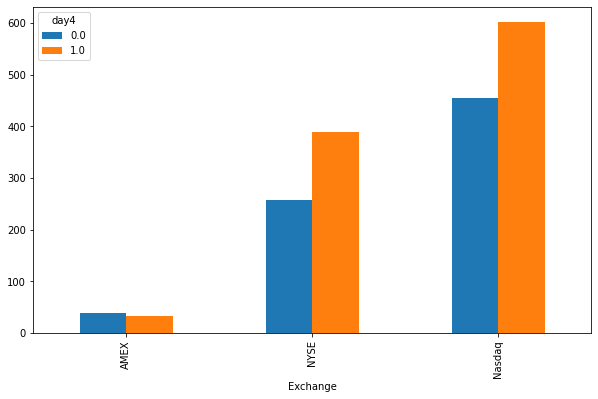

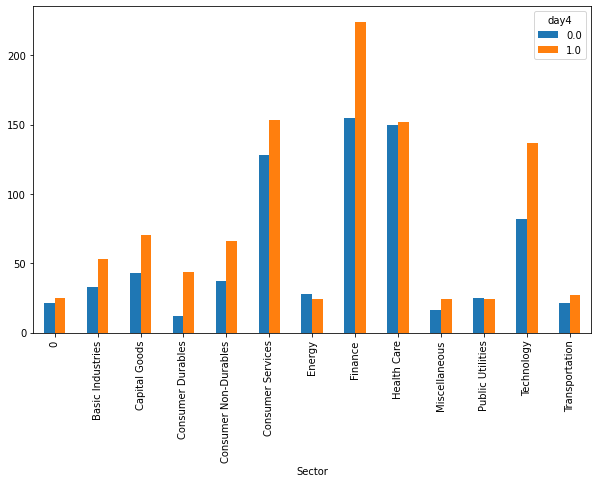

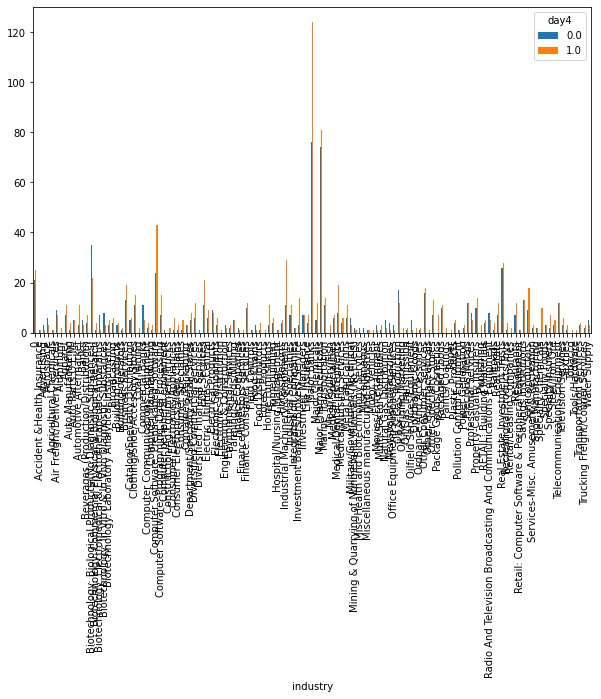

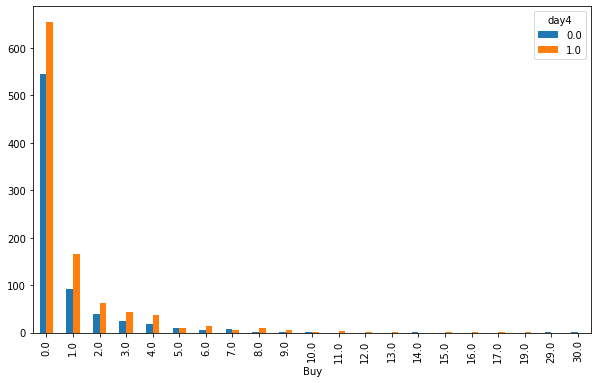

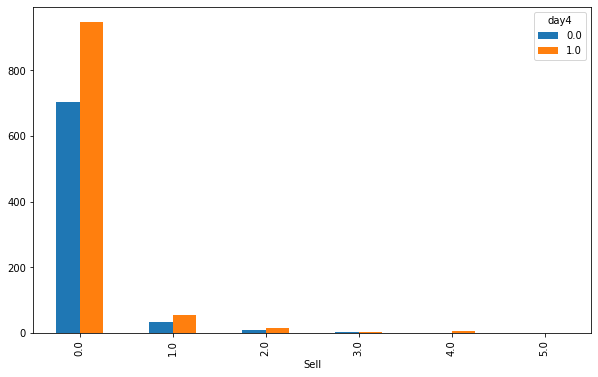

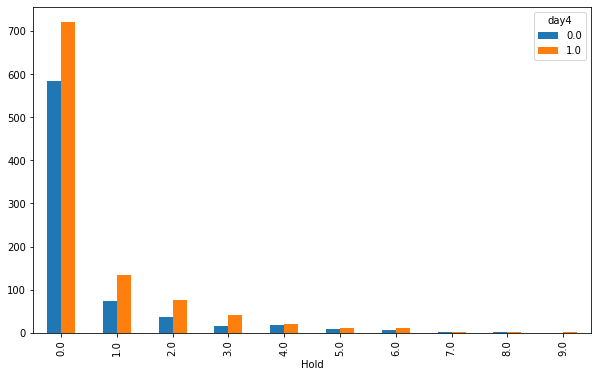

In [628]:
for column in category_columns:
    train.groupby([column, 'day4']).size().unstack().plot.bar(figsize=(10,6))

<AxesSubplot:xlabel='Exponential Moving Average', ylabel='day4'>

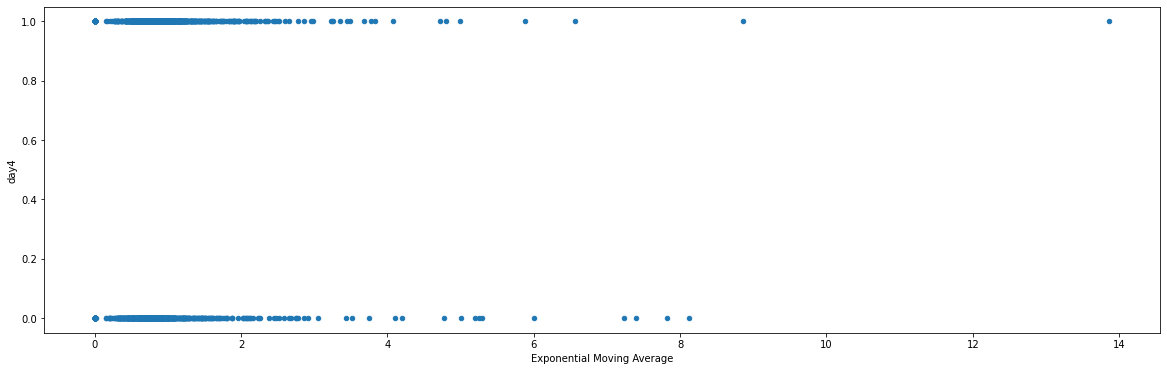

In [629]:
train.plot.scatter('Exponential Moving Average', 'day4', figsize=(20,6))

In [630]:
for column in category_columns:
    train[column] = train[column].astype('category').cat.codes

In [631]:
train.Expected = train.Expected.where(train.Expected != '-', 0)

In [632]:
train['Previous_Earnings_Date'] = train['Previous_Earnings_Date'].astype('datetime64')
train.Expected = train.Expected.astype('float64')

In [634]:
#now we'll create the test set

In [684]:
train_ex = train[train.Previous_Earnings_Date < pd.to_datetime('2020-09-01')]
test = train[train.Previous_Earnings_Date >= pd.to_datetime('2020-09-01')]
# test = test[test.Previous_Earnings_Date <= pd.to_datetime('2020-09-07')]

In [685]:
train.dtypes

Symbol                                object
Name                                  object
Exchange                                int8
Sector                                  int8
industry                               int16
dividendRate                         float64
lastSplitDate                          int64
lastSplitFactor                      float64
Buy                                     int8
Sell                                    int8
Hold                                    int8
Previous_Earnings_Date        datetime64[ns]
Expected                             float64
daysSinceLastDividend                float64
BBP                                  float64
Exponential Moving Average           float64
day1                                 float64
day2                                 float64
day3                                 float64
day4                                 float64
close on day 0                       float64
close on day 1                       float64
close on d

In [686]:
X_train = train_ex.drop(columns=['Symbol', 'Name', 'Previous_Earnings_Date', 'day1', 'day2', 'day3', 'day4',
                                'close on day 0', 'close on day 1', 'close on day 2',
                                 'close on day 3', 'close on day 4'])
X_test = test.drop(columns=['Symbol', 'Name', 'Previous_Earnings_Date', 'day1', 'day2', 'day3', 'day4',
                                'close on day 0', 'close on day 1', 'close on day 2',
                                 'close on day 3', 'close on day 4'])
y_train = train_ex['day3']
y_test = test['day3']

In [687]:
print(X_train.shape)
print(X_test.shape)

(1598, 13)
(176, 13)


In [640]:
test['Previous_Earnings_Date'].unique()

array(['2020-09-07T00:00:00.000000000', '2020-09-08T00:00:00.000000000',
       '2020-09-02T00:00:00.000000000', '2020-09-09T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-09-03T00:00:00.000000000',
       '2020-09-15T00:00:00.000000000', '2020-09-04T00:00:00.000000000',
       '2020-09-10T00:00:00.000000000', '2020-09-14T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [688]:
K=100
accuracies = np.zeros(K-1)
std_acc = np.zeros((K-1))
for i in range(1,K):
    knn = KNN(n_neighbors = i, algorithm='brute').fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    accuracies[i-1] = metrics.accuracy_score(y_test, y_hat)
    
    std_acc[i-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

    
k=accuracies.argmax()+1
print('The best value of k is ', k)



The best value of k is  19


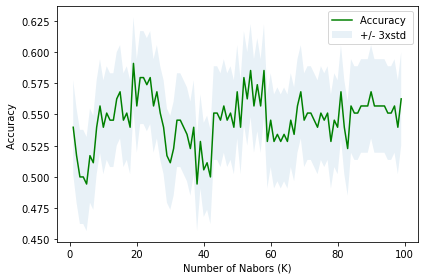

In [689]:
plt.plot(range(1,K), accuracies, 'g')
plt.fill_between(range(1,K), accuracies-1*std_acc, accuracies+1*std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [690]:
knn = KNN(n_neighbors = 19).fit(X_train, y_train)
y_hat = knn.predict(X_test)
print("KNN Accuracy Score: ", metrics.accuracy_score(y_test, y_hat))
print('KNN Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_hat))
print('Precision Score: ', metrics.precision_score(y_test, y_hat))

KNN Accuracy Score:  0.5909090909090909
KNN Confusion Matrix:
[[39 45]
 [27 65]]
Precision Score:  0.5909090909090909


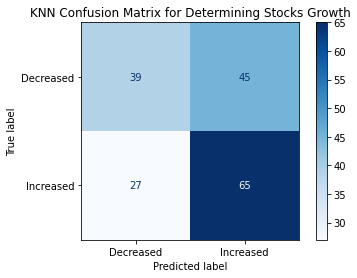

In [691]:
disp = metrics.plot_confusion_matrix(knn, X_test, y_test, display_labels=['Decreased', 'Increased'], cmap=plt.cm.Blues)
disp.ax_.set_title('KNN Confusion Matrix for Determining Stocks Growth')
plt.show()

In [692]:
from sklearn.linear_model import LogisticRegression as Classifier
    
classifier = Classifier(max_iter=10000).fit(X_train, y_train)
y_hat = classifier.predict(X_test)
print("LR Accuracy Score: ", metrics.accuracy_score(y_test, y_hat))
print("LR Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_hat))
print('Precision Score: ', metrics.precision_score(y_test, y_hat))

LR Accuracy Score:  0.5
LR Confusion Matrix: 
[[14 70]
 [18 74]]
Precision Score:  0.5138888888888888


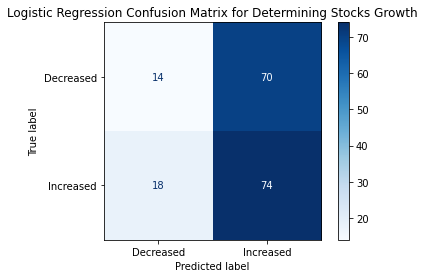

In [693]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, display_labels=['Decreased', 'Increased'], cmap=plt.cm.Blues)
disp.ax_.set_title('Logistic Regression Confusion Matrix for Determining Stocks Growth')
plt.show()

RF Accuracy Score:  0.5340909090909091
RF Confusion Matrix: 
[[14 70]
 [12 80]]
Precision Score:  0.5333333333333333


<AxesSubplot:>

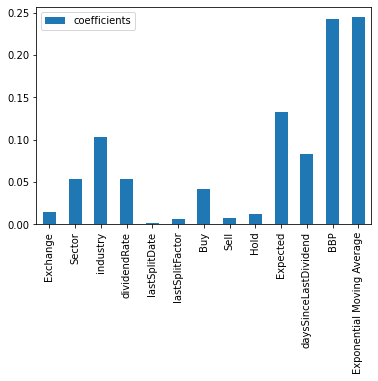

In [694]:
from sklearn.ensemble import RandomForestClassifier as Classifier
from sklearn import metrics

depth=3
min_samples=5
classifier = Classifier(max_depth=depth, min_samples_split=min_samples, random_state=1).fit(X_train, y_train)
y_hat = classifier.predict(X_test)
print("RF Accuracy Score: ", metrics.accuracy_score(y_test, y_hat))
print("RF Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_hat))
print('Precision Score: ', metrics.precision_score(y_test, y_hat))
df = pd.DataFrame(data=classifier.feature_importances_, index=X_train.columns, columns=['coefficients'])
df.plot(kind='bar')


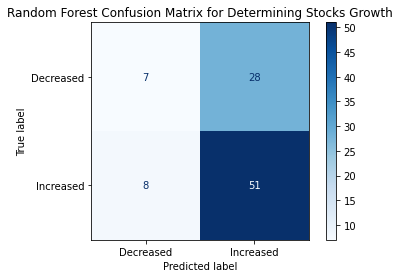

In [680]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, display_labels=['Decreased', 'Increased'], cmap=plt.cm.Blues)
disp.ax_.set_title('Random Forest Confusion Matrix for Determining Stocks Growth')
plt.show()

In [700]:
import xgboost as xgb
from sklearn import metrics
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)
param = {
'max_depth': 6,  # the maximum depth of each tree
'eta': 0.3,  # the training step for each iteration
'silent': 1,  # logging mode - quiet
'objective': 'multi:softprob',  # error evaluation for multiclass training
'num_class': 3,
'colsample_bytree': 0.4,
'gamma':0.05}  # the number of classes that exist in this datset
num_round = 100  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)
probs = bst.predict(dtest)

y_hat = probs.argmax(axis=1)
print("XGB Accuracy Score: ", metrics.accuracy_score(y_test, y_hat))
print("XGB Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_hat))
print('Precision Score: ', metrics.precision_score(y_test, y_hat))


[21:48:26] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGB Accuracy Score:  0.48863636363636365
XGB Confusion Matrix: 
[[25 59]
 [31 61]]
Precision Score:  0.5083333333333333
